# Select a subset of participants

Data on participants consists of the following:

### Ranges
* Age
* Name
* Yrs Loan Taken

### Categories
* Ethnicity
* Income
* Employment
* Education
* State

### Binary
* Completed Degree
* Hispanic/Latino
* Currently Have Student Loan
* Primary Person Making Repayment
* Loan Balance <32K
* Ever Missed a Payment
* Having Difficulty Making Payments

Some data is missing from the original pdf tables this spreadsheet was created from. In cases where data is missing, the value is "?"

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import qgrid

participants_df = pd.read_excel('Participants.xlsx', header=None , names = ['Name', 
    'PID', 'State', 'Gender', 'Age', 'Education', 'Completed Degree', 'Employment', 'Income', 'Ethnicity',
    'Hispanic/Latino', 'Currently Have Student Loan', 'Primary Person Making Repayment', 
    'Loan balance <$32K', 'Year Loan Taken', 'Ever Missed a Payment', 'Having Difficulty Making Payments'])

answers_df = pd.read_excel('Answers_Edited_530.xlsx', sheet_name = "Answers" , names = ['PID', 'TQID', 'AID', 'Answer', 'Code'] )

## QGrid for Filtering Data by Participants

Use the table below to select a subset of participants which you can then run subsequent analysis on. Click the filter on a given column's header to select ranges or specific values for each column

In [2]:
participants_qgrid = qgrid.show_grid(participants_df, show_toolbar=True)
participants_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Generate Dataframe Filtered by Participant

The code below will generate a new dataframe based on the filters selected in the cell above. This dataframe will allow users to identify the set of answers data from the Answers.xlsx spreadsheet corresponding to selected participants.

In [3]:
participants_filtered_df = participants_qgrid.get_changed_df()
participants_filtered_df

,Name,PID,State,Gender,Age,Education,Completed Degree,Employment,Income,Ethnicity,Hispanic/Latino,Currently Have Student Loan,Primary Person Making Repayment,Loan balance <$32K,Year Loan Taken,Ever Missed a Payment,Having Difficulty Making Payments
0,Aliana,1,california,F,31,technical degree,yes,Full Time,$50-99K,-,Yes,Yes,Yes,No,2012,Yes,Yes
4,Christine,5,california,F,31,technical degree,yes,Unemployed,<$30K,African American,No,Yes,Yes,No,2012 2013,Yes,Yes
7,Paul,8,california,M,32,college graduate,yes,Full Time,$30-49K,Asian,No,Yes,Yes,Yes,2008 2015,No,Yes
8,Jonathan,9,california,M,30,college graduate,yes,Full Time,$30-49K,Caucasian,No,Yes,Yes,Yes,2013 2014,Yes,Yes
19,Connie,20,Pennsylvania,F,30,graduate degree,yes,Part Time,$50-99K,Asian,No,?,?,No,2012,Yes,Yes


Create an object `qgrid_pids` which lists the selects PIDs and is then passed to locate values in Answers.xlsx

In [4]:
qgrid_pids = participants_filtered_df['PID'].values

In [5]:
specific_participants_answers_df = answers_df.loc[answers_df['PID'].isin(qgrid_pids)]

## QGrid for Filtering Answers Data by TQID, Code

This grid allows us to apply new filters to the Answers.xlsx dataset. Previously, we have selected specific participants from the database using a variety of filters. Now, with the dataset which only includes those participants we selected, we can filter the TQID, code, or combination of those which we are interested in viewing summary statistics and other data visualizations on.

In [6]:
answers_qgrid = qgrid.show_grid(specific_participants_answers_df, show_toolbar=True)
answers_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Generate Dataframe Filtered by TQID and Code

The following cell will generate a dataframe based on the filters which have been applied in the TQID and Code fields.

In [7]:
answers_filtered_df = answers_qgrid.get_changed_df()
answers_filtered_df

,PID,TQID,AID,Answer,Code
29,1,T1Q5,1,"No,",judgment of clarity of document
30,1,T1Q5,2,"because it's not really giving me an amount,",content
31,1,T1Q5,3,like if I needed a lower payment it,judgment of clarity of document
32,1,T1Q5,4,doesn't really have an amount on there.,question about eligibility
33,1,T1Q5,5,Right.,action: call loan servicer
1396,5,T1Q5,1,"Definitely my standard plan,",option he/she would choose
1397,5,T1Q5,2,the fixed monthly payments which is what I'm ...,reason for choice
1398,5,T1Q5,3,that way I'm more confident,reason for choice
1399,5,T1Q5,4,"in knowing that the amount stays the same,",preference for options
1400,5,T1Q5,5,"I know how much I make,",self-judgment about eligibility


TODO: 
- Make a cell which displays the filters that have been applied for double checking
- count average response length (per tqid, code, pid) - # answers per tqid x words per coded answer
- compare average response length to baselines - identify unusually common words, bigrams, etcs
- Sentiment analysis???
- common codes per tqid
- common words per code

## sklearn CountVectorizer

sklearn's CountVectorizer splits the process into 3 distinct steps:

- Preprocessing, where actions which are taken across the whole dataset are applied. This is any type of processing to be done before splitting into tokens. 

- Tokenization, where the dataset is split from a large string into a matrix which includes the existence and prevalence of each word in each sentence.

- Analysis, where higher level functions such as ngram counting take place 


Beyond these three, it is possible to do fancy token-level analysis such as stemming, lemmatizing, compound splitting, filtering based on part-of-speech, etc. 

In [48]:
answers_filtered_df.sample(3)

,PID,TQID,AID,Answer,Code
32,1,T1Q5,4,doesn't really have an amount on there.,question about eligibility
8668,20,T1Q5,3,is that what you're asking?,lack of understanding
31,1,T1Q5,3,like if I needed a lower payment it,judgment of clarity of document


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = list(answers_filtered_df['Answer'])
X = vectorizer.fit_transform(corpus)

In [50]:
vectorizer.vocabulary_.get('definitely')

16

In [51]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Extract bigrams from corpus

In [52]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r'\b\w+\b', min_df=1)

In [53]:
bigram_analyze = bigram_vectorizer.build_analyzer()

In [54]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()

In [55]:
bigram_analyze(str(corpus))

['no because',
 'because it',
 'it s',
 's not',
 'not really',
 'really giving',
 'giving me',
 'me an',
 'an amount',
 'amount like',
 'like if',
 'if i',
 'i needed',
 'needed a',
 'a lower',
 'lower payment',
 'payment it',
 'it doesn',
 'doesn t',
 't really',
 'really have',
 'have an',
 'an amount',
 'amount on',
 'on there',
 'there right',
 'right definitely',
 'definitely my',
 'my standard',
 'standard plan',
 'plan the',
 'the fixed',
 'fixed monthly',
 'monthly payments',
 'payments which',
 'which is',
 'is what',
 'what i',
 'i m',
 'm currently',
 'currently doing',
 'doing is',
 'is the',
 'the best',
 'best for',
 'for me',
 'me that',
 'that way',
 'way i',
 'i m',
 'm more',
 'more confident',
 'confident in',
 'in knowing',
 'knowing that',
 'that the',
 'the amount',
 'amount stays',
 'stays the',
 'the same',
 'same i',
 'i know',
 'know how',
 'how much',
 'much i',
 'i make',
 'make i',
 'i can',
 'can note',
 'note it',
 'it and',
 'and all',
 'all that',
 'th

## Using Stopwords

Stopwords are those which will be discluded from analysis, such as it, they, if, and other words which have little informational value. This is a tricky topic and we should probably decide case by case what is unimportant based on the subtlety of insights in the dataset

BAGS OF WORDS - fixed integer to each word, for each document #i, count number of occurences of word w, store in `W[i,j]` as the value of the feature #j where j is the index of w in the dictionary

## Term Frequency vs Inverse Document Frequency

What are the most informative words? - probably not those that always occur, or those that rarely occur, but those which occur at some fraction in between - closest to 1/2

# Interactive Charts 

TODO: Make the charts below display relevant information and give some interactive options for the user

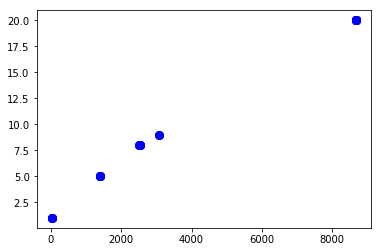

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt


answers_filtered_df = answers_qgrid.get_changed_df()
x = answers_filtered_df.index
y = answers_filtered_df['PID']


fig, ax = plt.subplots()
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    answers_filtered_df = answers_qgrid.get_changed_df()
    x = answers_filtered_df.index
    y = answers_filtered_df['PID']
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

answers_qgrid.on('filter_changed', handle_filter_changed)


x = answers_filtered_df.index
y = answers_filtered_df['PID']

## Chart to See TQIDs present per Code

Below is a very simple graphical display of which codes are present for the selected tqids or vice versa. More analysis can be applied to make this chart much more interesting. Examples include - number of instances, multicolor comparisons of several PIDs, and other ways to add more diversity to the visualiation.

In [18]:
answers_qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

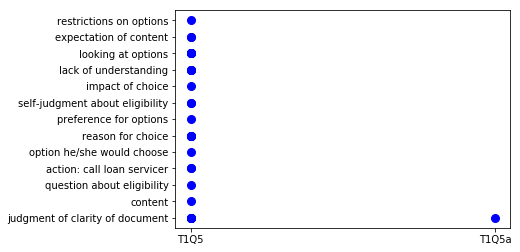

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt


answers_filtered_df = answers_qgrid.get_changed_df()
x = answers_filtered_df['TQID']
y = answers_filtered_df['Code']


fig, ax = plt.subplots()
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    answers_filtered_df = answers_qgrid.get_changed_df()
    x = answers_filtered_df.index
    y = answers_filtered_df['PID']
    fig.canvas.draw()
    barh.set_data(x, y)
    fig.canvas.draw()

answers_qgrid.on('filter_changed', handle_filter_changed)


x = answers_filtered_df.index
y = answers_filtered_df['PID']

TODO: 
- Create more relevant examples of bar graphs and scatter plots which can be generated from data. 
- Make an easy way for user to select the x and y axes of what is being graphed
- Add a feature where PID can be represented by color - each user has a unique color so that charts can have x, y, even z axes, in addition to color segmented users - allows for more fine grained visualziations
- Make a feature to list filters which have been applied to generate `answers_filtered_df` easily
- Make a feature to easily filter with a simple command
- Make an easy way to save one or multiple dataframes with simple commands and subsequently do comparative anlaysis
- Framework for df vs df analysis
- Deal with TF/IDF and stopwords (above)
- decide on parsing method - contractions as one word? what to do about punctuation?

# OLD CODE

Below is code which is no longer relevant

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tempadmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [ ]:
answers_filtered_df['tokens'] = answers_filtered_df.apply(lambda row: row['tokens'])

In [43]:
answers_list = list(answers_filtered_df['tokens'])
flat_answers_list = [item for sublist in answers_list for item in sublist]
flat_answers_list
answers_fd = FreqDist(flat_answers_list)

In [44]:
answer_bigrams = nltk.bigrams(flat_answers_list)

TODO: Make the below code count bigrams rather than simply list them all

In [45]:
answer_bigrams

<generator object bigrams at 0x1a1b1ce0c0>

## Tokenize Answer Column

Tokenize the answer column using 'Whitespace Tokenizer', which does not split up contractions and currently appends punctuation to the token (which is probably not ideal)

In [8]:
from nltk.tokenize import WhitespaceTokenizer
answers_filtered_df['Answer'] = answers_filtered_df['Answer'].astype(str)
answers_filtered_df['tokens'] = answers_filtered_df.apply(lambda row: WhitespaceTokenizer().tokenize(row['Answer']), axis=1)